In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits 

In [8]:
digits = load_digits()

In [12]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [13]:
digits.data[2]

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

<Figure size 640x480 with 0 Axes>

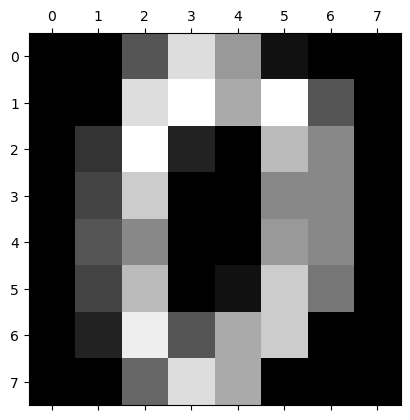

In [14]:
plt.gray()
plt.matshow(digits.images[0])

In [15]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [18]:
from sklearn.model_selection import train_test_split
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [20]:
X_train, X_test, Y_train, Y_test =  train_test_split(digits.data,digits.target , test_size=0.2)

In [21]:
len(X_train)

1437

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
model.score(X_test, Y_test)

c:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.95

In [42]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
# confusion_matrix.plot()
confusion_matrix

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,29,0,0,0,0,0,0,0,0,0
1,0,28,0,0,2,0,0,0,0,0
2,0,0,36,0,0,0,0,0,0,0
3,0,0,0,41,0,1,0,0,0,0
4,0,0,0,0,36,0,0,1,0,0
5,0,0,1,1,1,27,0,1,0,1
6,0,1,0,0,0,0,30,0,0,0
7,0,0,0,0,0,1,0,43,1,0
8,0,2,0,0,0,0,0,0,36,0


In [38]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

Text(95.72222222222221, 0.5, 'Actual')

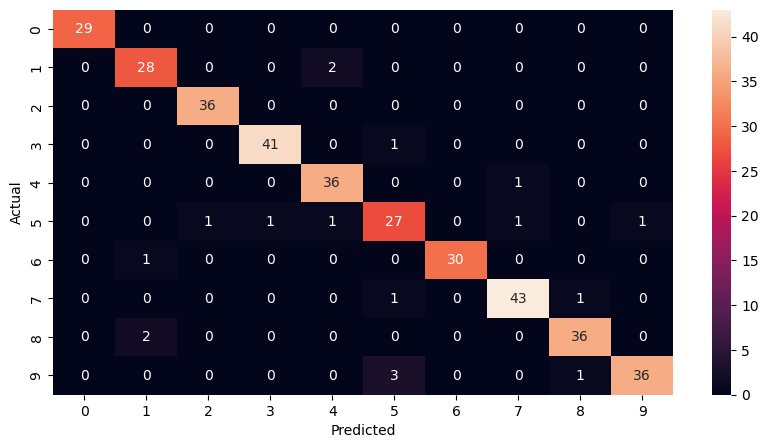

In [48]:
import seaborn as sb
plt.figure(figsize=(10, 5))
sb.heatmap(confusion_matrix , annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")